<a href="https://colab.research.google.com/github/yoobyoungcheol/AIstudy24/blob/master/%EC%9D%B8%EA%B3%B5%EC%8B%A0%EA%B2%BD%EB%A7%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MBC마켓에서 이번엔 럭키백을 패션분야에 접목을 시키려고한다
# 패션 분야이기 때문에 상품 개수가 늘어나고 어종이 아닌 일반 잡화용으로 제공하기로 하였다.

In [24]:
# 딥러닝의 시작 인공신경망

# MNIST 데이터 셋 : 손으로 쓴 0~9까지의 숫자로 이루어져 있음
# 패션 MNIST 데이터 셋 : 숫자대신 패션아이템으로 이루어짐

# 실행마다 동일한 결과를 얻기 위해 케라스에 랜덤 시드를 사용하고
# 텐서플로 연산을 결정적으로 만듭니다.

import tensorflow as tf # 텐서플로

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

# 케라스 패키지 임포트
from tensorflow import keras

# load_data()가 훈련세트와 테스트세트로 데이터를 나누어 반환 (input과 target의 쌍으로 이루어진 데이터세트를 반환)
(train_input, train_target),(test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [25]:
print(train_input.shape,train_target.shape) # 전달받은 데이터의 크기를 확인
# 트레이닝 세트 (6만개, 28가로, 28세로),(타깃 6만개 1차원배열)
# 해상도는 28*28 픽셀

(60000, 28, 28) (60000,)


In [26]:
print(test_input.shape,test_target.shape)
# 테스트 세트 (1만개, 28가로, 28세로),(타깃 1만개 1차원배열)

(10000, 28, 28) (10000,)


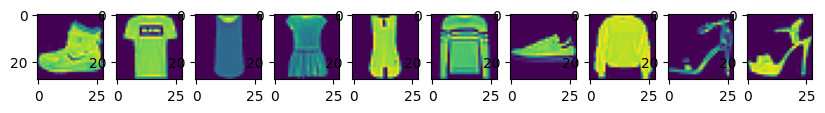

In [27]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1,10,figsize=(10,10))

for i in range(10):
    axs[i].imshow(train_input[i],cmap='viridis')   # viridis
    axs[i].axis('on')
plt.show()

In [28]:
print([train_target[i] for i in range(10)])  # 샘플 타깃 확인

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]


In [29]:
# 0~9번까지의 타깃이 있음
# target_values = {0 : 'T-shirt/top',
#                  1 : 'Trouser',
#                  2: 'Pullover',
#                  3: 'Dress',
#                  4: 'Coat',
#                  5: 'Sandal',
#                  6: 'Shirt',
#                  7: 'Sneaker',
#                  8: 'Bag',
#                  9: 'Ankle boot'}

In [30]:
import numpy as np

print(np.unique(train_target, return_counts=True))
# 10개의 배열에 정확히 6000개씩 샘플이 들어 있는 것을 확인할수 있다.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


In [31]:
# 로지스틱 회귀로 패션 아이템 분류하기

# 6만개 전체를 한번에 훈련하는 것보다 샘플 1 개씩 꺼내서 모델을 훈련해보자
# 확률적 경사 하강법 : SGDClassifier (분류용)
# SGDClassifier를 사용할 때 표준화 전처리된 데이터를 사용
# 확률적 경사 하강법은 여러 특성 중 기울기가 가장 가파른 방향을 따라 이동
# 만약 특성마다 값의 범위가 많이 다르면 올바르게 손실함수의 경사를 내려 올 수 없음
# 패션 MNIST의 경우 흑백이기에 0~255사이의 정수값을 가짐
# -> 255로 나누어 0~1 사이값으로 정규화 진행 ( 양수값으로 이루어진 이미지 전처리용)

# reshape로 2차원 배열을 1차원 배열로 펼침
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1,28*28) # -1은 모든 값
print(train_scaled.shape)
# SGDClassifier는 2차원 지원 안함 28*28 = 784

(60000, 784)


In [32]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss="log_loss",max_iter=5,random_state=42)
# max_iter 5번 반복, cross_validate 교차검증
scores = cross_validate(sc, train_scaled,train_target, n_jobs=-1)
print(np.mean(scores["test_score"]))  # 5번 반복에 대한 테스트 평균

0.8194166666666666


In [33]:
# 로지스틱 회귀
# z = a * (weight) + b * (Length) + c * (Diagonal) + d * (Height) + e * (width) + f

# 선형방정식
# z_티셔츠 = a * (픽셀1) + b * (픽셀2) + c * (픽셀3) + d * (픽셀4) + e * (픽셀5)..... + f * (픽셀784) + f(절편)

# 바지에 대한 출력은 티셔츠와 다른 값을 사용해야 함 (티셔츠와 다름)
# z_바지 = a1 * (픽셀1) + b1 * (픽셀2) + c1 * (픽셀3) + d1 * (픽셀4) + e1 * (픽셀5)..... + f1 * (픽셀784) + f(절편)

# 나머지 클래스에 대한 선형 방적식도 동일 -> 10 개의 클래스에 대한 선형 방적식을 모두 계산함
# 다음단계인 소프트맥스 함수를 통과하면 각 클래스에 대한 확률을 얻을 수 있음

In [34]:
# 인공신경망 (artificial 아티피셜 neural 뉴럴 network        ANN)
# 을 사용하여 패션 아이템 분류 문제의 성능을 높혀보자
# https://todayisbetterthanyesterday.tistory.com/41

# z_티셔츠 ~ 클래스 10개인 z_10까지 계산하고 이를 바탕으로 클래스를 예측하기 때문에
# 신경망의 최종 값은 출력층 (output Layar)

# 인공신경망의 z 값 계산하는 단위는 뉴런(Neuron)이라고 부름
# -> 선형계산을 진행 (대부분 유닛이라고 부름)

# 픽셀 1 ~ 784번 픽셀까지를 입력층 (input layar)이라고 부름

# z_1을 만들기 위해서 픽셀1인 x_1에 곱해지는 가중치는 w_1.1.......10개의 뉴런
# 사람 뇌에 있는 뉴런과 다름 (무언가를 만들어 내는 것이 아니라 알고리즘의 일종)
# 확률적 경사 하강법을 사용한 로지스틱  회귀 모델이
# 가장 간단한 인공 신경망이라면 인공신경망을 만들어도 성능이 좋아지지 않는다

In [35]:
# 딥러닝 라이브러리에서 인기 높은 텐서플로를 사용해보자

# 텐서플로(tensorflow)
# 구글이 2015년 11월 오픈소스로 공개한 딥러닝 라이브러리
#   -> 알파고 시절
# 텐서플로우 2.x 버전이 2019년 9월에 릴리스 됨

import tensorflow as tf

from tensorflow import keras # 케라스 : 고수준 api
# 딥러닝 라이브러리는 GPU(그래픽카드)를 사용하여 인공 신경망을 훈련함
# (GPU는 백터와 행렬 연산으로 3D연산에 최적화 되어 있음)
# 곱샘과 덧샘이 많이 수행되는 이ㅐㄴ공신경망에 속도를 높여준다
# 케라스 라이브러리는 직접 GPU연산을 수행하지 않는다
# 대신 GPU연산을 수행하는 다른 라이브러리를 백앤드로 사용한다
# 텐서플로가 케라스 백앤드로 사용할수 있다 -> 멀티-백앤드 케라스 라고 부름
# 케라스 API만 익히면 다양한 딥러닝 라이브러리를 입맛대로 골라서 사용할 수 있다.
# (직관적이고 사용하기 편함)

In [36]:
# 인공신경망으로 모델만들기 : 앞에서 만든 train_scaled, train_target을 사용
# 인공신경망에서는 교차검증을 하용하지 않고 검증세트를 별도로 덜어내어 사용
# 이유 1 : 딥러닝 분야의 데이터 셋은 충분히 크기 때문에 검증 점수가 안정적이다
# 이류 2 : 교차 검증을 수행하기에는 훈련시간이 너무 오래 걸림
# -> plt시간이 몇시간 , 며칠이 걸릴 수도 있음
from sklearn.model_selection import train_test_split

# train_scaled(트레인 스케일) : val_scaled(값 스케일 = 검증세트 20%)
# train_target(트레인 타겟) : val_target(값 타겟 = 검증세트 20%)
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled,train_target,test_size=0.2,random_state=42)

print(train_scaled.shape,train_target.shape)    # 훈련세트 48,000 +
print(val_scaled.shape,val_target.shape)        # 검증세트 12,000 = 60,000

(48000, 784) (48000,)
(12000, 784) (12000,)


In [36]:
# 딥러닝에서는 다양한 종류의 층을 추가하는 식으로 모델을 만듬
# 이번 장에서는 Dense 층을 사용 , 밀집층, 완전연결층, fully connteced layer

# 10개의 유닛
# 다중 분류이므로 활성화 함수는 소프트맥스, 입력 값은 784개의 원소로 이루어진 1차원 배열
# 이진 분류이면 시그모이드 함수를 사용함

# 케라스는 첫 번쨰 층에 입력 크기를 넣어야 합니다
# 그 다음에 추가되는 층은 자동으로 계산되기 때문에 넣을 필요 없음
# 케라스 모델은 Sequential 클래스로 만듬

# 인공신경망의 오른쪽에 놓은 층을 만듬
# 10개의 패션아이템을 분류하기 위해서 아양한 층이 존대
# 가장 기본이 되는 층이 밀집층 (dense layer)
# 밀집층(dense layer) : 784개의 픽셀과 뉴런이 모두 연결된 선이라는 뜻

# 이런층을 뉴런이 모두 연결하고 있어 완전 연결층(fully connteced layer) 이라고 부름

In [38]:
danse = keras.layers.Dense(10, activation='softmax', input_shape=(784,))
#                          뉴런의 개수 뉴런에 적용할 함수 입력의 크기
# activation='softmax' : 출력되는 값을 확률로 바꿈 -> 다중 분류
# activation='sigmoid' : 이진분류
# 입력의 크기는 10개의 뉴런이 각각 몇개의 입력을 받는지 튜플로 지정함

In [40]:
# 이제 밀집층을 가진 신경망 모델을 만들자
model = keras.Sequential([danse])
# 밀집층을 가진 신경망 모델을 만듬 Sequential(순차적구조) 클래스를 사용함
# Sequential 클래스의 객체를 만들때 앞에서 만든 밀집층의 객체 danse를 전달함
# 여기서 만든 model 객체가 바로 신경망 모델임

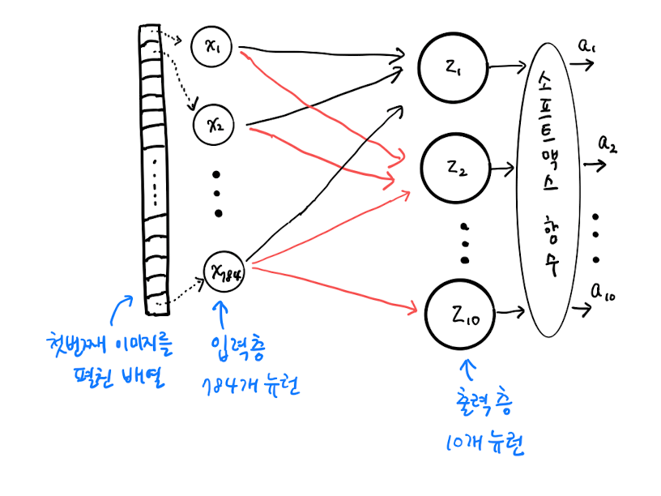

In [41]:
# softmax와 같이 뉴런의 선형 방정식 계산 결과에 적용되는 함수를 활성화 함수라고 함
# 위 그림을 보면 a표시 되어있음

# 인공신경망으로 패션 아이템 분류하기

# 케라스 모델 훈련전 설정 단계
# model 객체의 compile() 매서드에서 수행
# 손실함수 : loss='sparse_categorical_crossentropy' (히소 다중분류 손실함수) -> 정수타깃
#                 'sparse_binary_crossentropy       (히소 이진분류 손실함수) -> 이진타깃
# 측정값 metrics=['accuracy'] -> 정확도(에큐러시)의 지표가 됨
model.compile(loss='sparse_categorical_crossentropy',metrics=['accuracy'])
# 케라스는 자동으로 에포크마다 손실을 기록한다 . (추가로 정확도를 기록하기 위해 metrics를 추가함 )

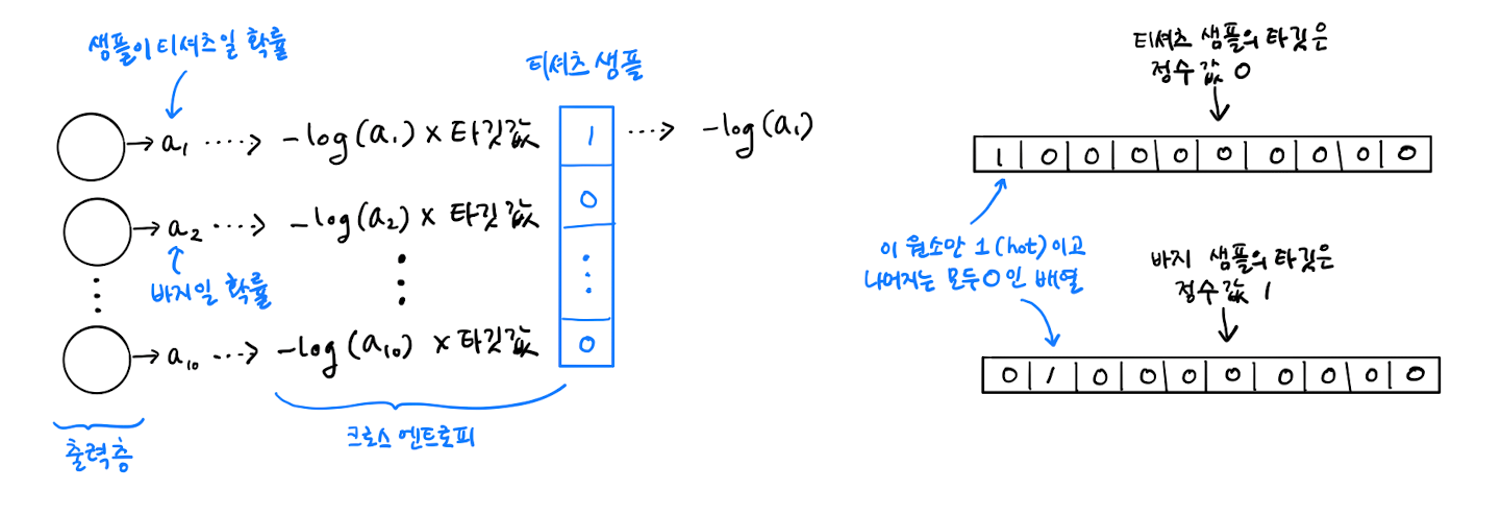

In [43]:
print(train_target[:10]) # 정수형으로 타깃생성되어 있음 -> 원~핫 인코딩

[7 3 5 8 6 9 3 3 9 9]


In [44]:
model.fit(train_scaled,train_target,epochs=5)
# 훈련시작 (에포크 5로 5번 훈련중...)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7354 - loss: 0.7875
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8336 - loss: 0.4851
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8450 - loss: 0.4564
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8507 - loss: 0.4422
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8534 - loss: 0.4335


In [45]:
# 에포크마다 걸린시간 , 정확도(accuracy) , 손실률(loss)
# 0.8534 높은 점수를 리턴함

# 케라스 모델의 성능을 평가하는 메서드 evaluate(이벨루에이트)
model.evaluate(val_scaled,val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8456 - loss: 0.4358


[0.4437465965747833, 0.8464999794960022]

In [ ]:
# 사이킷런과 케라스 모델 비교

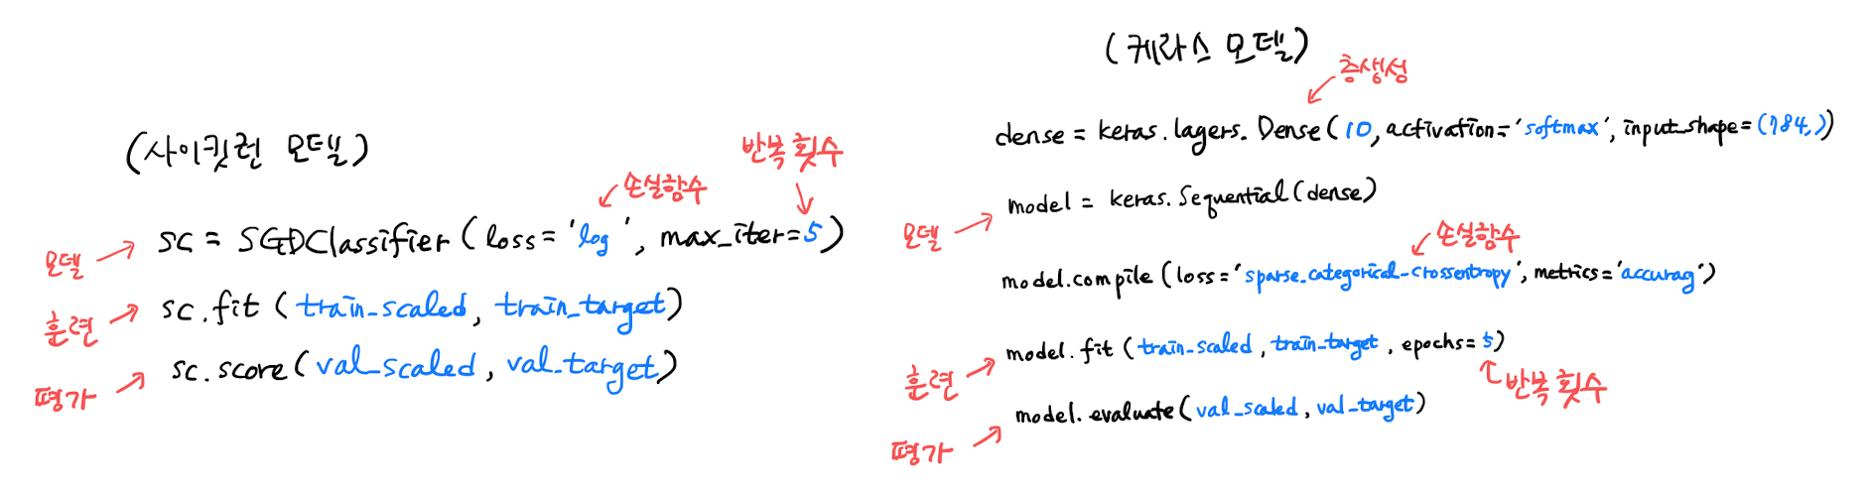